Given:  
mocked exp data & model data of 32 species + ODE

In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import tensorflow as tf

import models

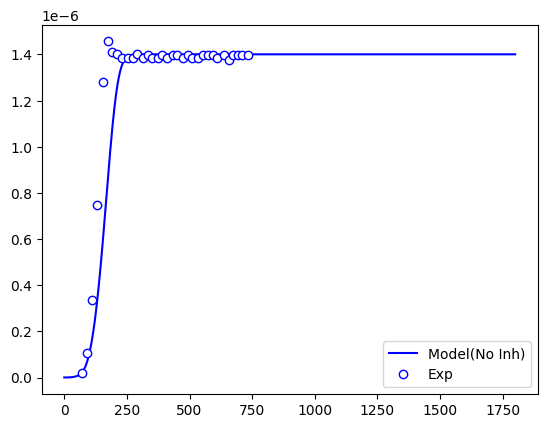

In [2]:
data = sio.loadmat("../../data/data_case_1.mat")
t_test = data["t"]
u_test = data["Y"] # scaling?

#name_list = ['TF','VII', 'TF:VII', 'VIIa', 'TF:VIIa', 'IX', 'IXa', 'IXm', 'IXam',
#'X', 'Xa', 'Xm', 'Xam', 'II', 'IIa', 'IIm', 'IIam', 'PL', 'AP', 'VIII', 'VIIIa', 'VIIIm',
#'VIIIam', 'VIIIam:IXam', 'V', 'Va', 'Vm', 'Vam', 'Xam:Vam', 'I', 'Ia', 'TFPI', 'Xa:TFPI', 'ATIII']

TIM = 1800
NDM = [0.025, 10.0, 0.005, 10.0, 0.005, 90.0, 90.0, 10.0, 10.0, 170.0,
       170.0, 10.0, 10.0, 1400.0, 1400.0, 10.0, 10.0, 10.0, 10.0,
       0.7, 0.7, 0.7, 0.7, 0.7, 20.0, 20.0, 10.0, 10.0, 10.0, 7000.0,
       7000.0, 2.5, 2.5, 3400.0] #nM

exp_data_1 = np.loadtxt("../../data/exp_data_case_1.dat").T
t_exp_1 = exp_data_1[0].reshape([-1, 1])
u_exp_1 = exp_data_1[1].reshape([-1, 1])

# NDM[14] = 1400.0, NDM[16] = 10.0
plt.plot(t_test * TIM, (u_test[:, 14] * NDM[14] + u_test[:, 16] * NDM[16]) * 1e-9, 'b', label='Model(No Inh)')
plt.plot(t_exp_1, u_exp_1, 'bo', markerfacecolor='w', label='Exp')
plt.legend()
plt.show()

[1.00000000e+00 1.00000000e+00 4.51504515e+00 9.19780185e-01
 4.70601947e+00 1.00000000e+00 1.00000000e-04 8.99075842e+00
 8.99557766e-04 1.00000000e+00 8.64516393e-04 1.69286564e+01
 3.48749708e+00 1.00000000e+00 2.86547702e-02 1.35987715e+02
 1.36002339e+02 1.00000000e+00 1.00010003e+00 1.00000000e+00
 1.00000000e-04 9.98533450e-01 9.96964871e-01 9.43497926e-03
 1.00000000e+00 1.08006068e-04 1.99854437e+00 1.95574431e+00
 1.97165471e+00 1.00000000e+00 1.00010017e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]


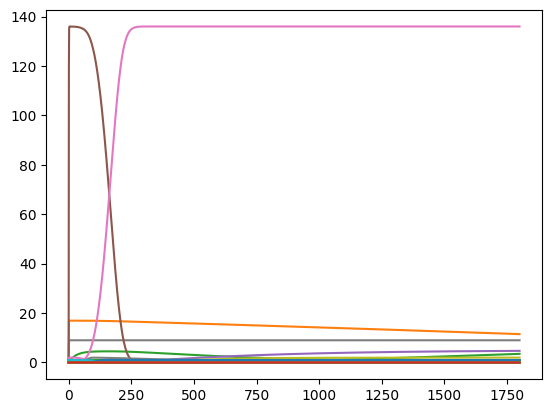

In [3]:
print(np.max(data["Y"], axis=0))

plt.plot(t_test * TIM, u_test)
plt.show()

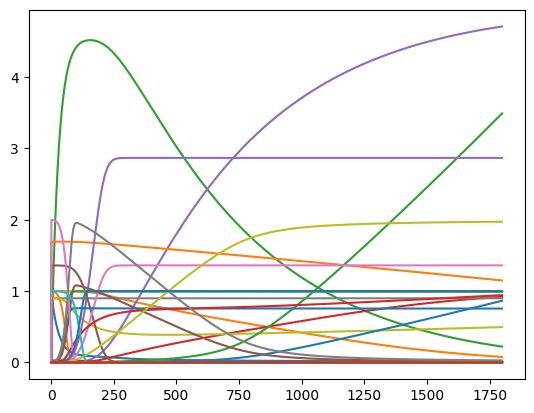

In [4]:
scale_model = np.array(
    [1, 1, 1, 1, 1, 1, 0.0001, 10, 0.001, 1, \
     0.001, 10, 1, 1, 0.01, 100, 100, 1, 1, 1, \
    0.0001, 1, 1, 0.01, 1, 0.0001, 1, 1, 1, 1, \
    1, 0.001, 0.001, 0.001]
).reshape([-1])

u_test = u_test / scale_model

plt.plot(t_test * TIM, u_test)
plt.show()

In [5]:
print(u_exp_1)

scale_exp = 1e-6
u_exp_1 = u_exp_1 / scale_exp

[[1.91456e-08]
 [1.06822e-07]
 [3.34846e-07]
 [7.48835e-07]
 [1.27861e-06]
 [1.45576e-06]
 [1.41011e-06]
 [1.40129e-06]
 [1.38546e-06]
 [1.38541e-06]
 [1.38536e-06]
 [1.39936e-06]
 [1.38528e-06]
 [1.39752e-06]
 [1.38520e-06]
 [1.38515e-06]
 [1.39915e-06]
 [1.38507e-06]
 [1.39905e-06]
 [1.39726e-06]
 [1.38493e-06]
 [1.39892e-06]
 [1.38485e-06]
 [1.38480e-06]
 [1.39879e-06]
 [1.39875e-06]
 [1.39870e-06]
 [1.38463e-06]
 [1.39861e-06]
 [1.37575e-06]
 [1.39853e-06]
 [1.39848e-06]
 [1.39669e-06]
 [1.39664e-06]]


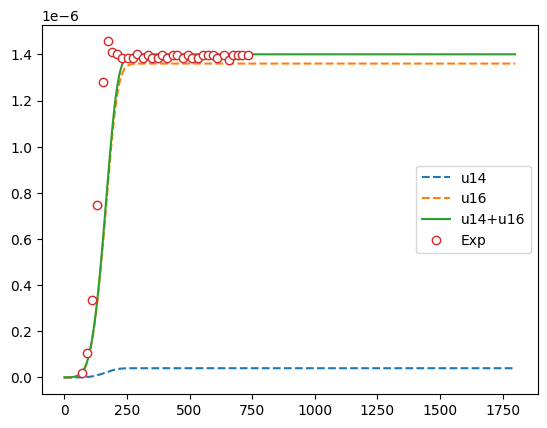

In [6]:
# scale_model[14] = 0.01, scale_model[16] = 100
plt.plot(t_test * TIM, u_test[:, 14] * NDM[14] * scale_model[14] * 1e-9, '--', label='u14')
plt.plot(t_test * TIM, u_test[:, 16] * NDM[16] * scale_model[16] * 1e-9, '--', label='u16')
plt.plot(t_test * TIM, (u_test[:, 14]* NDM[14] * scale_model[14] + u_test[:, 16] * NDM[16] * scale_model[16]) * 1e-9, label='u14+u16')
plt.plot(t_exp_1, u_exp_1 * scale_exp, 'o', markerfacecolor='w', label='Exp')
plt.legend()
plt.show()

In [7]:
t_train_model = t_test[::20]
u_train_model = u_test[::20]
t_train_exp = t_train_model
u_train_exp = ((u_train_model[:, 14]* NDM[14] * scale_model[14] + u_train_model[:, 16] * NDM[16] * scale_model[16]) / NDM[16] / scale_model[16]).reshape([-1, 1])
f_train = np.zeros_like(u_train_model)

model = models.PINN(eps1=1, eps2=1e-2)

In [8]:
# loss = model.train(t_train, f_train, t_train, u_train, niter=200000)
loss = model.train(t_train_model, f_train, t_train_model, u_train_model, t_train_exp, u_train_exp, niter=30000)
# print total loss, model data loss, exp_data_loss, ode loss, eq10_loss,eq31_loss, eq32_loss

0 3.7085779 2.2825956 1.4001741 2.5808024 0.8318991 1.7489034
1000 0.2287882 0.08646262 0.14199932 0.032625623 0.016028257 0.016597366
2000 0.20339777 0.061522506 0.14180319 0.00720728 0.0050723553 0.0021349248
3000 0.1758421 0.0337167 0.1418747 0.02506996 0.015954383 0.009115578
4000 0.157605 0.015555508 0.14190194 0.014756881 0.008025517 0.0067313635
5000 0.14967093 0.0077777584 0.1418313 0.006186881 0.0033033143 0.002883567
6000 0.14485069 0.00299354 0.14180842 0.004873173 0.0019728865 0.0029002863
7000 0.14386997 0.0015895879 0.14181276 0.046763033 0.022609828 0.024153205
8000 0.14300855 0.0011735437 0.14181548 0.0019519909 0.00086795556 0.0010840353
9000 0.1428338 0.0010006211 0.14181818 0.0014984717 0.0008431261 0.00065534556
10000 0.14272174 0.0008903512 0.1418194 0.0011997978 0.0007499899 0.00044980794
11000 0.14266387 0.0008180421 0.1418197 0.002611615 0.0015914178 0.0010201972
12000 0.14258832 0.0007627865 0.14181855 0.0006977279 0.0004393375 0.00025839038
13000 0.14396107 0.

In [9]:
model.restore()
u_pred = model.call(tf.constant(t_test, tf.float32)).numpy()

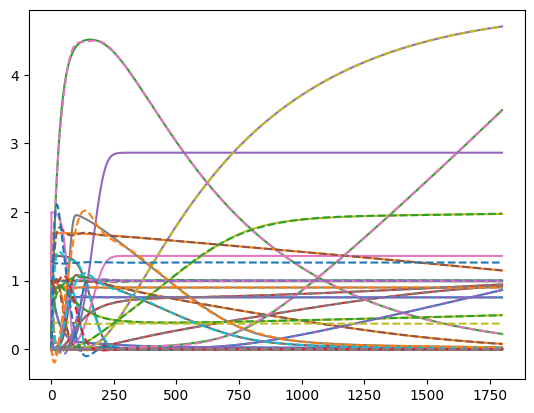

In [10]:
plt.plot(t_test * TIM, u_test)
plt.plot(t_test * TIM, u_pred, '--')
plt.show()

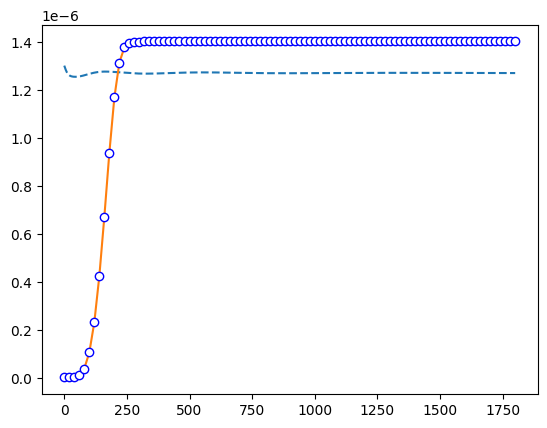

In [11]:
plt.plot(t_test * TIM, (u_pred[:, 14] * NDM[14] * scale_model[14] + u_pred[:, 16] * NDM[16] * scale_model[16]) * 1e-9, '--', label='Model(No Inh)')
plt.plot(t_train_model * TIM, (u_train_model[:, 14] * NDM[14] * scale_model[14] + u_train_model[:, 16] * NDM[16] * scale_model[16]) * 1e-9, label='Model(No Inh)')
# plt.plot(t_train_exp, u_train_exp * scale_exp, 'bo', markerfacecolor='w', label='Exp')
plt.plot(t_train_exp * TIM, u_train_exp * NDM[16] * scale_model[16] * 1e-9, 'bo', markerfacecolor='w', label='Exp')
plt.show()

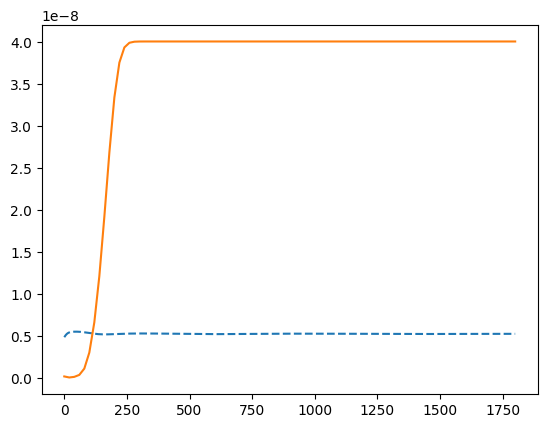

In [12]:
plt.plot(t_test * TIM, u_pred[:, 14] * NDM[14] * scale_model[14] * 1e-9, '--')
plt.plot(t_train_model * TIM, u_train_model[:, 14] * NDM[14] * scale_model[14] * 1e-9)
plt.show()

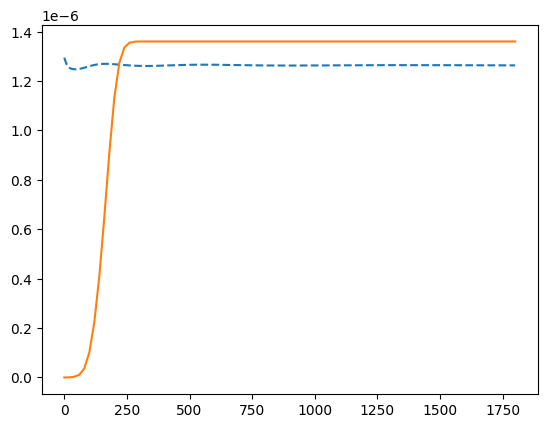

In [13]:
plt.plot(t_test * TIM, u_pred[:, 16] * NDM[16] * scale_model[16] * 1e-9, '--')
plt.plot(t_train_model * TIM, u_train_model[:, 16] * NDM[16] * scale_model[16] * 1e-9)
plt.show()

In [14]:
# h_10_TPplus = 4.381
# h_10_TPminus = 5.293 * 1e-8
# h_2 = 1.79 * 1e-4
print("h_10_TPplus:", model.h_10_TPplus.numpy())
print("h_10_TPminus:", model.h_10_TPminus.numpy())
print("h_2:", model.h_2.numpy())

h_10_TPplus: 0.0
h_10_TPminus: 0.0
h_2: 0.0
